In [4]:
#Logit
rm(list=ls())

# Please Answer all the questions
# ===============================
# Logistic Regression, also known as Logit,
# is typically used in models where the dependent
# variables have a binary outcome (True/False, which is coded with 1/0).
# You model the log odds of the outcome
# as a linear combination of predictor variables).

# [Terminology]:
# 0- logit = logistic regression
# 1- output variable = outcome = response variable = dependent variable
# 2- input variables (features) = predictor variables = explanatory variables = drivers = independent variables
# 3- residual: the true value - the predicted value
# 4- fit = train the model
# 5- odds of an event: the likelihood of that event to happen. (anologous to probability but not the same)
# 6- odds ratio = p/(1-p) --> the prob. to occur / the prob to not occur
#                             for example: p = 0.2, 1-p = 0.8 --> odds ratio is 1 to 4
# 7- log odds ratio: log(odds ratio) = log(p/(1-p)) = y = sum_over_i(coeff_i * feature_i), i = 0 to n
# 8- the prob. p from log odds ratio p = 1 / (1 + e^-y) --> sigmoid function


In [6]:
# [Data Description]:
# the marketing campaign team wants to send
# special offers to those respondents with the highest probability of purchase.
# the response variable is purchase or no purchase
# given customer income and age and product price
Mydata <- read.csv("survey.csv",header=TRUE,sep=",")

In [7]:
# [1] Explore data
table(Mydata$MYDEPV) # the outcome variable
                     # purchase or no purchase
with(Mydata, table(Price,MYDEPV))
summary(Mydata$Age)
cor.mat <- cor(Mydata[,-1]) # the input variables
cor.mat # Note: The general rule is not to include variables in your model that are
        # too highly correlated with other predictors.
        # corr 0: independent, corr 1: highly correlated, corr -1: highly correlated in inverse direction



  0   1 
426 324 

     MYDEPV
Price   0   1
   10 115 135
   20 137 113
   30 174  76

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   32.00   32.00   35.98   43.00   66.00 

,Price,Income,Age
Price,1,0.00000000,0.00000000
Income,0,1.00000000,0.09612083
Age,0,0.09612083,1.00000000


In [8]:
#(Q1) Write the variable pairs that are not correlated at all to each other.
# ==>  (Price, Age) and (Price, Income)

In [9]:
#(Q2) Are there any highly correlated variables in this dataset?
# ==> No because all pair have a low correlation value

In [10]:
# [2] Test a model with 3 variables Price, Income and Age
mylogit <- glm(MYDEPV ~ Income + Age + as.factor(Price),
           data =Mydata, family=binomial(link="logit"),
           na.action=na.pass) # as.factor(Price) : to deal with price as categorical feature
summary(mylogit)
                 # Additional information:
                 # ==================
                 # Read this: http://www.theanalysisfactor.com/r-glm-model-fit/
                 # Deviance: Deviance is a measure of the "badness" of fit (trained model) of a generalized linear model
                 #      the smaller the better
                 # Null Deviance shows how well the response variable is predicted by a model that includes only the intercept
                 # Residual Deviance: after including the weighted predictors to the intercept
                 # The quantity: 1 - (Residual deviance/Null deviance)
                 #      is  called "pseudo-R-squared"; you use it to evaluate "goodness" of fit
                 # AIC: provides a method for assessing the quality of your model through comparison of related models.
                 #      it's useful for comparing models, but isn't interpretable on its own.
                 #      the smaller the better
                 # Fisher Scoring: This doesn't really tell you a lot of what you need to know,
                 #      other than the fact that the model did indeed converge, and had no trouble doing it.
                 # ===== End of additional information =======

    # Notice how the price in coefficient section is divided into 2 entries:
    # as.factor(Price)20, as.factor(Price)30


Call:
glm(formula = MYDEPV ~ Income + Age + as.factor(Price), family = binomial(link = "logit"), 
    data = Mydata, na.action = na.pass)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -6.02116    0.53244 -11.309  < 2e-16 ***
Income              0.12876    0.00923  13.950  < 2e-16 ***
Age                 0.03506    0.01179   2.974  0.00294 ** 
as.factor(Price)20 -0.74418    0.26439  -2.815  0.00488 ** 
as.factor(Price)30 -2.21028    0.31108  -7.105  1.2e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1025.81  on 749  degrees of freedom
Residual deviance:  534.17  on 745  degrees of freedom
AIC: 544.17

Number of Fisher Scoring iterations: 6


In [11]:
#(Q3): How many categories are there for the Price variable?
# There are 3 categories for price (10, 20, 30)

In [12]:
#(Q4): Why is it divided into two entries only in the model?
# ==> Because it is 3 categories so it is divided into n-1 variables which is 2

In [13]:
# Review the "Estimate" column. For every one unit change in Income (while other variables are constants),
# the log odd ratio of Purchase (not the probability) increases by 0.12876 (the coefficients)

# [3] ROC Curve
if(!require("ROCR"))
{
  install.packages("ROCR")
  library(ROCR)
}
#### NOTE: For this part, you need to search and read about the ROC curve.
pred = predict(mylogit, type="response") # this returns the probability scores on the training data
predObj = prediction(pred, Mydata$MYDEPV) # prediction object needed by ROCR

rocObj = performance(predObj, measure="tpr", x.measure="fpr")  # creates ROC curve obj
aucObj = performance(predObj, measure="auc")  # auc object

auc = aucObj@y.values[[1]]
auc   # the auc score: tells you how well the model predicts.


Loading required package: ROCR

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ROCR’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




[1] 0.915272

In [14]:
#(Q5.1) Write the value of this expression (just the number)
# ==> Area under the curve = 0.915271981684344

In [15]:
#(Q5.2) What is the maximum value of AUC (ideal case)?
# ==> The maximum AUC is 1 so it maximizes the TPR and minimizes FPR

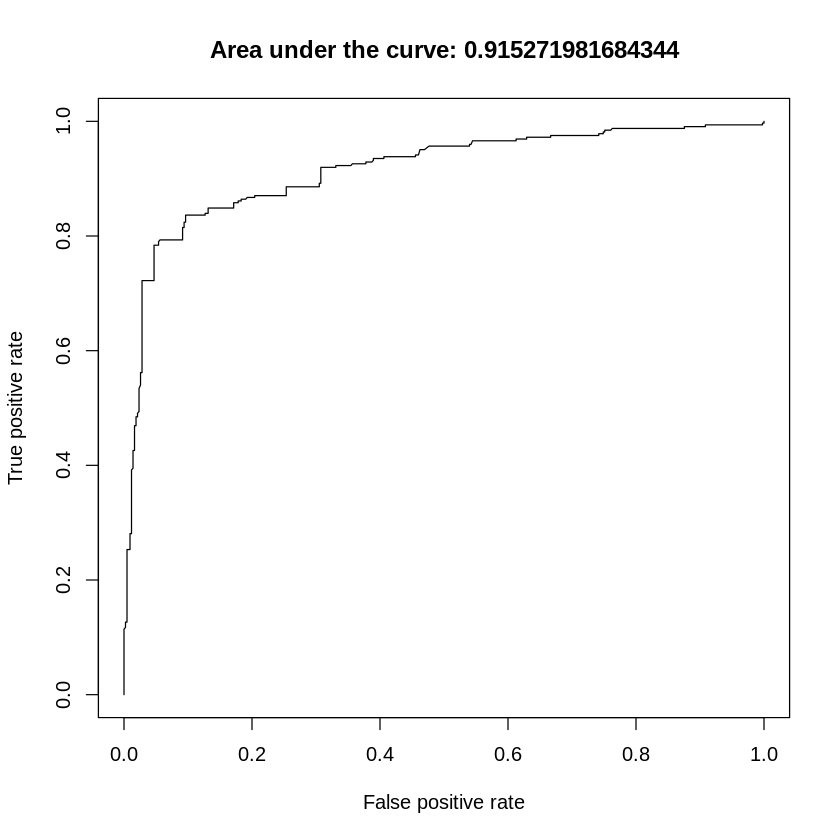

In [16]:
# plot the roc curve
plot(rocObj, main = paste("Area under the curve:", auc))


In [18]:
#(Q6) What does each point in the ROC graph represent?
#In other words, what is the value that changes and drives TPR and FPR to change too
#from one point to another in the graph?

# ==> The threshold of classification either positive or negative so a good model
# ==> when move from left to right the TPR approach values near 1 with only a small change in FPR.

In [19]:
# [4] Predictions
#Prediction - 1
Price <- c(10,20,30)
Age <- c(mean(Mydata$Age))
Income <- c(mean(Mydata$Income))
newdata1 <- data.frame(Income,Age,Price) # Note: The predict function requires the variables to be named exactly as in the fitted model.
newdata1
newdata1$PurchaseP <- predict (mylogit,newdata=newdata1,type="response")
newdata1


Income,Age,Price
<dbl>,<dbl>,<dbl>
42.492,35.976,10
42.492,35.976,20
42.492,35.976,30


Income,Age,Price,PurchaseP
<dbl>,<dbl>,<dbl>,<dbl>
42.492,35.976,10,0.6707408
42.492,35.976,20,0.4918407
42.492,35.976,30,0.1826131


In [20]:
#(Q7) How is the predicted probability affected by changing only price holding all other variables constant?
# ==> It is getting lower because as the price increase
# ==> the probability of purchasing something more expensive is getting lower


Age,Income,Price
<dbl>,<dbl>,<dbl>
18,42.492,30
20,42.492,30
22,42.492,30
24,42.492,30
26,42.492,30
28,42.492,30
30,42.492,30
32,42.492,30
34,42.492,30


Age,Income,Price,PurchaseP
<dbl>,<dbl>,<dbl>,<dbl>
18,42.492,30,0.1063052
20,42.492,30,0.1131540
22,42.492,30,0.1203845
24,42.492,30,0.1280103
26,42.492,30,0.1360445
28,42.492,30,0.1444993
30,42.492,30,0.1533864
32,42.492,30,0.1627160
34,42.492,30,0.1724975


18,0.1063052
20,0.1131540
22,0.1203845
24,0.1280103
26,0.1360445
28,0.1444993
30,0.1533864
32,0.1627160
34,0.1724975
36,0.1827387
38,0.1934457


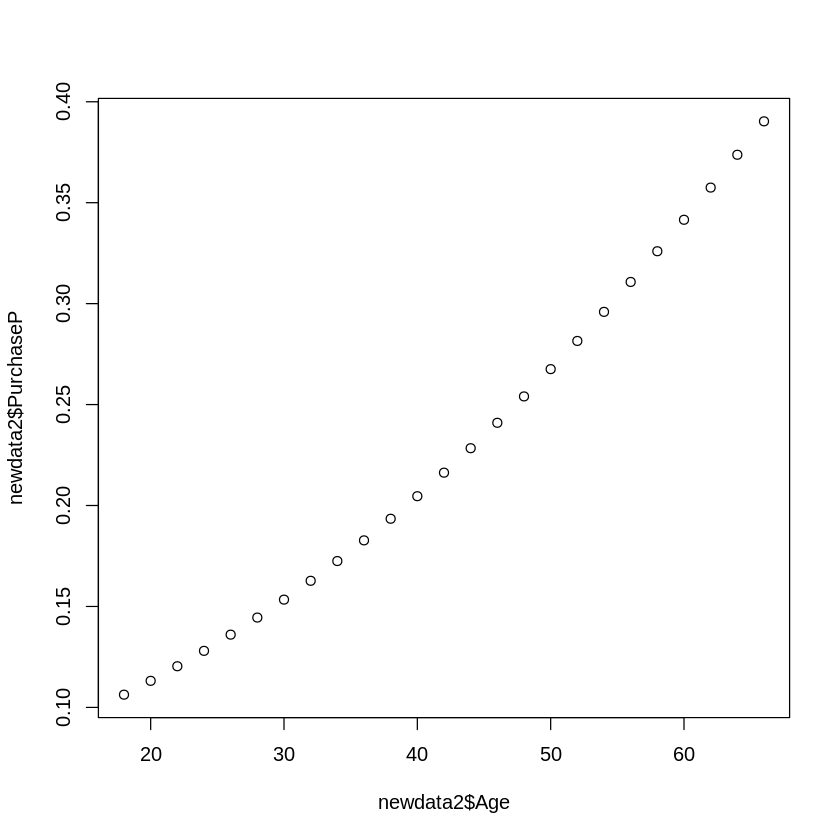

In [21]:
#Prediction - 2
newdata2 <- data.frame(Age=seq(min(Mydata$Age),max(Mydata$Age),2),
                       Income=mean(Mydata$Income),Price=30)
newdata2
newdata2$PurchaseP <- predict(mylogit,newdata=newdata2,type="response")
newdata2
cbind(newdata2$Age,newdata2$PurchaseP)
plot(newdata2$Age,newdata2$PurchaseP)

In [22]:
#(Q8) How is the predicted probability affected by changing only age holding all other variables constant?
# ==>  It is getting higher which also make sense because when a client is old.

20,0.01219091
30,0.04281102
40,0.13948050
50,0.37004640
60,0.68039246
70,0.88525564
80,0.96546923
90,0.99022745


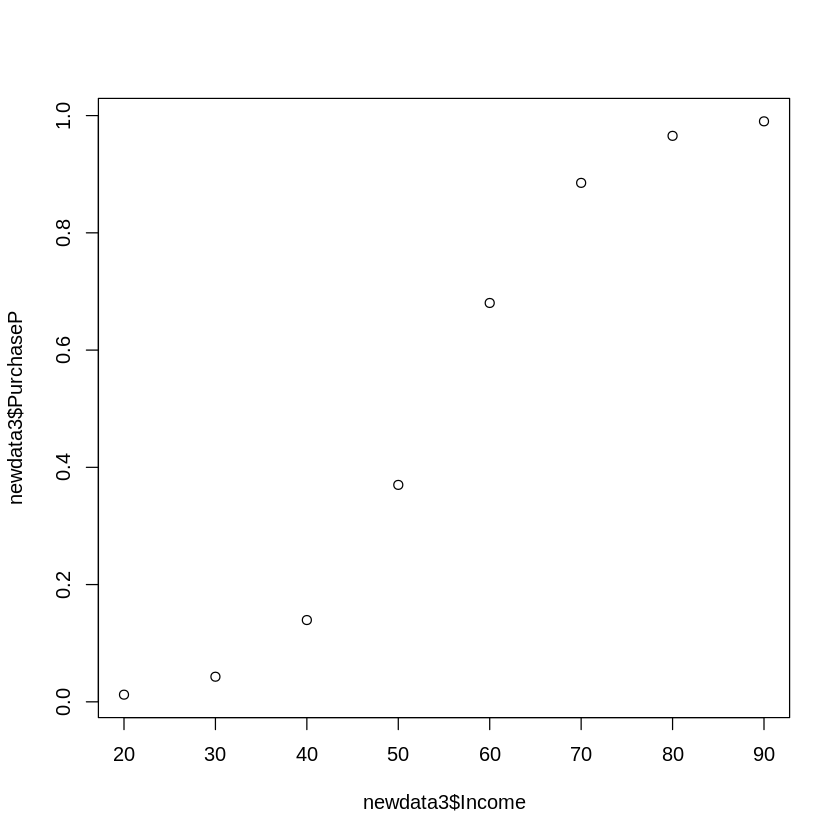

In [23]:
#Prediction - 3
newdata3 <- data.frame(Income= seq(20,90,10),Age=mean(Mydata$Age),Price=30)
newdata3$PurchaseP<-predict(mylogit,newdata=newdata3,type="response")
cbind(newdata3$Income,newdata3$PurchaseP)
plot(newdata3$Income,newdata3$PurchaseP)


In [24]:
#(Q9) How is the predicted probability affected by changing only income holding all other variables constant?
# ==> It is getting higher as the income increase and this is making sense
# ==> because when the income is getting higher
# ==> a client would have more money and would purchase with a high probability

In [25]:
#Prediction 4
newdata4 <- data.frame (Age= round(runif(10,min(Mydata$Age),max(Mydata$Age))),
                        Income= round(runif(10,min(Mydata$Income),max(Mydata$Income))),
                        Price = round((runif(10,10,30)/10))*10)
newdata4$Prob <- predict(mylogit,newdata=newdata4,type="response")
newdata4


Age,Income,Price,Prob
<dbl>,<dbl>,<dbl>,<dbl>
50,35,20,0.3762324
51,80,20,0.9951488
32,89,10,0.9985868
54,68,10,0.9903196
56,93,10,0.9996357
35,73,20,0.9793935
42,28,10,0.2802505
23,98,20,0.9987199
35,19,30,0.0103765
